In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from pandas_datareader import wb

# Exercise 1

## Exercise 1

With these imports

In [135]:
import datetime as dt 
from pandas_datareader import data

Write a program to calculate the percentage price change over 2019 for the following shares

In [136]:
ticker_list = {'INTC': 'Intel',
                          'MSFT': 'Microsoft',
                          'IBM': 'IBM',
                          'BHP': 'BHP',
                          'TM': 'Toyota',
                          'AAPL': 'Apple',
                          'AMZN': 'Amazon',
                          'BA': 'Boeing',
                          'QCOM': 'Qualcomm',
                          'KO': 'Coca-Cola',
                          'GOOG': 'Google',
                          'SNE': 'Sony',
                          'PTR': 'PetroChina'}

Here's the first part of the program

In [137]:
def read_data(ticker_list,  
         start=dt.datetime(2019, 1, 2),
         end=dt.datetime(2019, 12, 31)): 
    """
    This function reads in closing price data from Yahoo 
    for each tick in the ticker_list.
    """
    pd.set_option('precision', 2)
    ticker = pd.DataFrame()
    
    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices
        
    return ticker

ticker = read_data(ticker_list)

Complete the program to plot the result as a bar graph like this one.

# Solutions

## Exercise 1

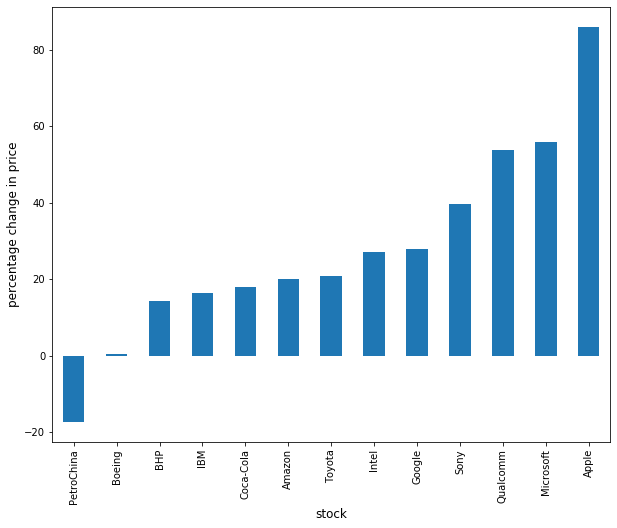

In [138]:
price_change = pd.Series(dtype=object)
for tick in ticker_list: 
    a = ticker.loc[ticker.index[0], tick]
    b = ticker.loc[ticker.index[-1], tick]
    change = 100 * float(np.diff((a, b))/a)
    name = ticker_list[tick]
    price_change[name] = change
    
price_change.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('stock', fontsize=12)
ax.set_ylabel('percentage change in price', fontsize=12)
price_change.plot(kind='bar', ax=ax)
plt.show()